In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [73]:
data=pd.read_csv('bengaluru.csv')
data.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,11,2,91,0.0,1014,14,10,109,8
1,2009-01-01 01:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,17,9,2,93,0.0,1014,14,7,85,6
2,2009-01-01 02:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,16,7,2,94,0.0,1014,13,5,61,4
3,2009-01-01 03:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,15,5,2,96,0.0,1014,12,2,37,3
4,2009-01-01 04:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,5,1,88,0.0,1015,14,5,45,3


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          96432 non-null  object 
 1   maxtempC           96432 non-null  int64  
 2   mintempC           96432 non-null  int64  
 3   totalSnow_cm       96432 non-null  float64
 4   sunHour            96432 non-null  float64
 5   uvIndex            96432 non-null  int64  
 6   uvIndex.1          96432 non-null  int64  
 7   moon_illumination  96432 non-null  int64  
 8   moonrise           96432 non-null  object 
 9   moonset            96432 non-null  object 
 10  sunrise            96432 non-null  object 
 11  sunset             96432 non-null  object 
 12  DewPointC          96432 non-null  int64  
 13  FeelsLikeC         96432 non-null  int64  
 14  HeatIndexC         96432 non-null  int64  
 15  WindChillC         96432 non-null  int64  
 16  WindGustKmph       964

In [75]:
data.isnull().sum()

date_time            0
maxtempC             0
mintempC             0
totalSnow_cm         0
sunHour              0
uvIndex              0
uvIndex.1            0
moon_illumination    0
moonrise             0
moonset              0
sunrise              0
sunset               0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
dtype: int64

# we will try making a model to predict temperature using linear regression

<Axes: xlabel='tempC'>

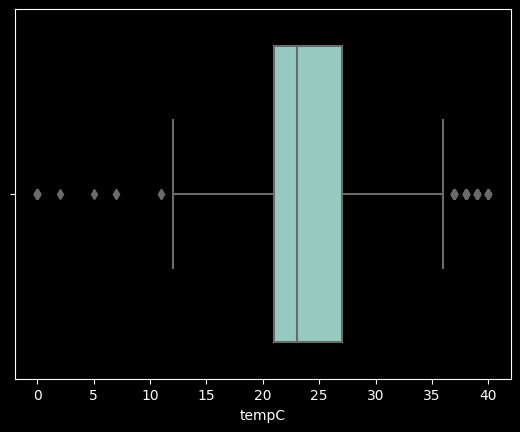

In [76]:
sns.boxplot(x=data['tempC'])

In [77]:
data['dates'] = pd.to_datetime(data['date_time']).dt.date
data['time'] = pd.to_datetime(data['date_time']).dt.time

In [78]:
data['dates'].dtype  , data['time'].dtype

(dtype('O'), dtype('O'))

In [79]:
data['dates']=pd.to_datetime(data['dates'])

In [80]:
data['hours'] = pd.to_datetime(data['date_time']).dt.hour

In [81]:
col=['date_time','time']
data.drop(columns=col,inplace=True)

In [82]:
data.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,dates,hours
0,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,2,91,0.0,1014,14,10,109,8,2009-01-01,0
1,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,2,93,0.0,1014,14,7,85,6,2009-01-01,1
2,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,2,94,0.0,1014,13,5,61,4,2009-01-01,2
3,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,2,96,0.0,1014,12,2,37,3,2009-01-01,3
4,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,1,88,0.0,1015,14,5,45,3,2009-01-01,4


<Axes: xlabel='dates', ylabel='tempC'>

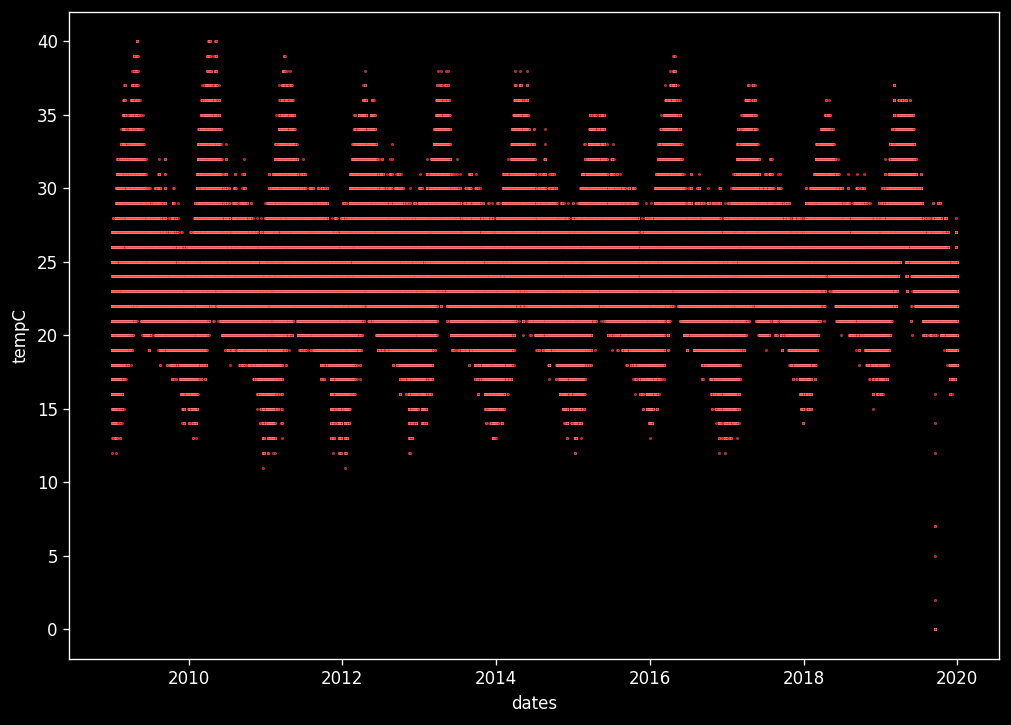

In [85]:
plt.figure(figsize=(10,7),dpi=120)
sns.scatterplot(x=data['dates'],y=data['tempC'],color='red',s=2)

In [86]:
data['day']=data['dates'].dt.day
data['month']=data['dates'].dt.month
data['year']=data['dates'].dt.year

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   maxtempC           96432 non-null  int64         
 1   mintempC           96432 non-null  int64         
 2   totalSnow_cm       96432 non-null  float64       
 3   sunHour            96432 non-null  float64       
 4   uvIndex            96432 non-null  int64         
 5   uvIndex.1          96432 non-null  int64         
 6   moon_illumination  96432 non-null  int64         
 7   moonrise           96432 non-null  object        
 8   moonset            96432 non-null  object        
 9   sunrise            96432 non-null  object        
 10  sunset             96432 non-null  object        
 11  DewPointC          96432 non-null  int64         
 12  FeelsLikeC         96432 non-null  int64         
 13  HeatIndexC         96432 non-null  int64         
 14  WindCh

In [90]:
data=data[~(data['dates'] > '2019-09-15')]

Text(0.5, 1.0, 'After removing outliers')

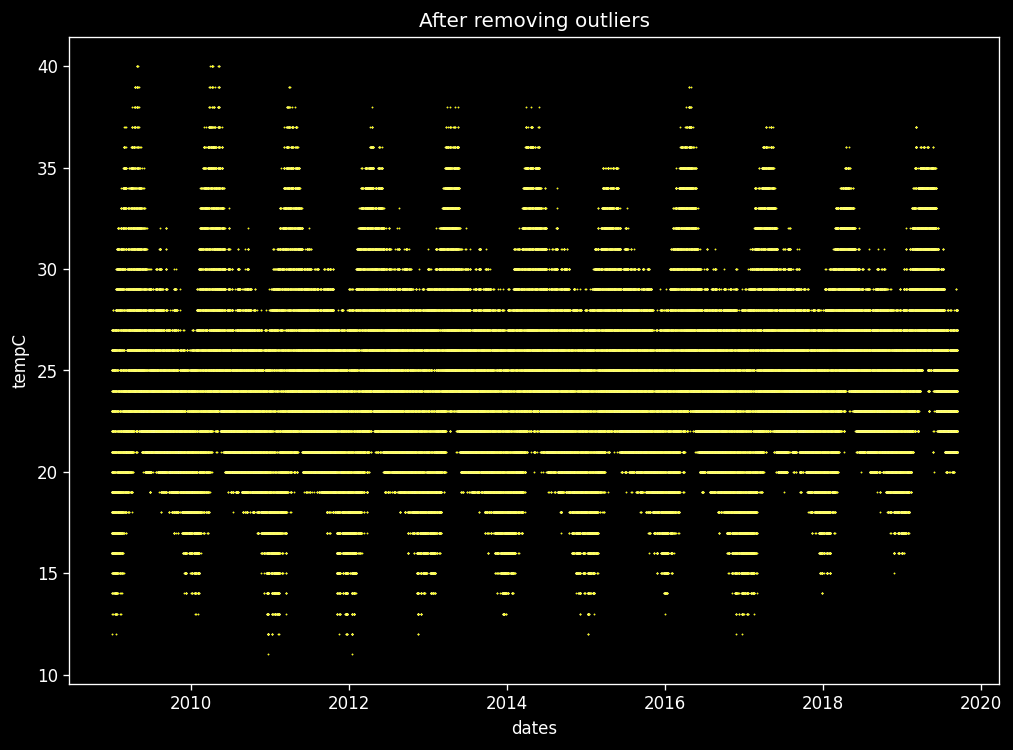

In [91]:
plt.figure(figsize=(10,7),dpi=120)
sns.scatterplot(x=data['dates'],y=data['tempC'],color='yellow',s=1)
plt.title('After removing outliers')

In [92]:
data.set_index('dates',inplace=True)

In [93]:
data.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,hours,day,month,year
dates,,,,,,,,,,,,,,,,,,,,,
2009-01-01,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,0.0,1014,14,10,109,8,0,1,1,2009
2009-01-01,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,0.0,1014,14,7,85,6,1,1,1,2009
2009-01-01,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,0.0,1014,13,5,61,4,2,1,1,2009
2009-01-01,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,0.0,1014,12,2,37,3,3,1,1,2009
2009-01-01,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,0.0,1015,14,5,45,3,4,1,1,2009


# saved categorical data seperate to figure out what to do with it

In [94]:
col=['moonrise','moonset','sunrise','sunset']

In [95]:
data1=data[col]

In [96]:
data.drop(columns=col,inplace=True)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93840 entries, 2009-01-01 to 2019-09-15
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   maxtempC           93840 non-null  int64  
 1   mintempC           93840 non-null  int64  
 2   totalSnow_cm       93840 non-null  float64
 3   sunHour            93840 non-null  float64
 4   uvIndex            93840 non-null  int64  
 5   uvIndex.1          93840 non-null  int64  
 6   moon_illumination  93840 non-null  int64  
 7   DewPointC          93840 non-null  int64  
 8   FeelsLikeC         93840 non-null  int64  
 9   HeatIndexC         93840 non-null  int64  
 10  WindChillC         93840 non-null  int64  
 11  WindGustKmph       93840 non-null  int64  
 12  cloudcover         93840 non-null  int64  
 13  humidity           93840 non-null  int64  
 14  precipMM           93840 non-null  float64
 15  pressure           93840 non-null  int64  
 16  tempC

# scaling and spliting the dataset into dependent and independent variables

In [98]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Y=data['tempC']
X=scaler.fit_transform(data.drop(columns=['tempC']))
X=pd.DataFrame(data=X,columns=data.drop(columns=['tempC']).columns)
X.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,humidity,precipMM,pressure,visibility,winddirDegree,windspeedKmph,hours,day,month,year
0,-0.79507,-2.6209,0.0,0.448351,-1.058076,-1.050835,-0.485656,-0.005289,-1.528552,-1.642233,...,1.205508,-0.190323,1.093043,0.328588,-0.763944,-0.773528,-1.661325,-1.670276,-1.581769,-1.572227
1,-0.79507,-2.6209,0.0,0.448351,-1.058076,-1.050835,-0.485656,-0.005289,-1.745501,-1.866825,...,1.296543,-0.190323,1.093043,-1.034232,-1.031776,-1.121662,-1.516862,-1.670276,-1.581769,-1.572227
2,-0.79507,-2.6209,0.0,0.448351,-1.058076,-1.050835,-0.485656,-0.243785,-1.962450,-2.091416,...,1.342060,-0.190323,1.093043,-1.942779,-1.299608,-1.469797,-1.372399,-1.670276,-1.581769,-1.572227
3,-0.79507,-2.6209,0.0,0.448351,-1.058076,-1.050835,-0.485656,-0.243785,-2.179399,-2.316008,...,1.433095,-0.190323,1.093043,-3.305599,-1.567440,-1.643864,-1.227936,-1.670276,-1.581769,-1.572227
4,-0.79507,-2.6209,0.0,0.448351,-1.058076,-1.050835,-0.485656,-0.243785,-1.528552,-1.642233,...,1.068956,-0.190323,1.405931,-1.942779,-1.478163,-1.643864,-1.083473,-1.670276,-1.581769,-1.572227


# checking collinearity between independent variables

In [101]:
X.corr()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,humidity,precipMM,pressure,visibility,winddirDegree,windspeedKmph,hours,day,month,year
maxtempC,1.000000e+00,4.867910e-01,NaN,5.863472e-01,7.748780e-01,0.134382,-1.916608e-02,-0.265670,0.551474,0.551653,...,-0.542519,-0.063511,-0.202328,0.256239,0.056266,-0.234421,-1.016285e-18,2.241776e-03,-4.949931e-01,5.612590e-02
mintempC,4.867910e-01,1.000000e+00,NaN,2.509236e-01,4.796832e-01,0.062321,-2.003118e-03,0.382313,0.544517,0.559164,...,-0.085554,0.088212,-0.564064,0.105649,0.474893,0.058137,1.526202e-18,-2.746604e-03,-7.736474e-02,2.218261e-01
totalSnow_cm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sunHour,5.863472e-01,2.509236e-01,NaN,1.000000e+00,4.843894e-01,0.093220,-2.355391e-02,-0.163370,0.321864,0.318512,...,-0.342918,-0.067020,-0.193947,0.270493,0.226468,0.000344,7.524529e-19,-3.043603e-02,-5.429035e-01,5.728662e-02
uvIndex,7.748780e-01,4.796832e-01,NaN,4.843894e-01,1.000000e+00,0.111682,-9.495408e-03,-0.252969,0.474759,0.474468,...,-0.493913,-0.061073,-0.157137,0.308667,0.041619,-0.132205,-1.083722e-18,-1.688298e-02,-4.573406e-01,2.311065e-01
uvIndex.1,1.343816e-01,6.232079e-02,NaN,9.322029e-02,1.116824e-01,1.000000,-2.453785e-03,-0.262532,0.715113,0.699695,...,-0.656737,-0.012427,-0.241438,0.267569,-0.013844,0.096034,7.086354e-02,-1.060668e-03,-7.076457e-02,1.599070e-02
moon_illumination,-1.916608e-02,-2.003118e-03,NaN,-2.355391e-02,-9.495408e-03,-0.002454,1.000000e+00,0.007367,-0.006482,-0.008132,...,0.007017,0.004783,-0.007738,0.019199,0.005490,-0.006526,6.294103e-19,1.305380e-02,2.547211e-03,-5.021111e-04
DewPointC,-2.656704e-01,3.823125e-01,NaN,-1.633700e-01,-2.529688e-01,-0.262532,7.367283e-03,1.000000,-0.103643,-0.084689,...,0.732521,0.163819,-0.292834,-0.223982,0.489600,0.046475,-9.019514e-02,3.966745e-03,4.333296e-01,-8.576027e-02
FeelsLikeC,5.514745e-01,5.445165e-01,NaN,3.218639e-01,4.747594e-01,0.715113,-6.481769e-03,-0.103643,1.000000,0.988394,...,-0.721577,0.018852,-0.488114,0.335621,0.199660,0.003794,1.220667e-01,-4.222079e-03,-2.077269e-01,1.018298e-01
HeatIndexC,5.516528e-01,5.591635e-01,NaN,3.185125e-01,4.744680e-01,0.699695,-8.131958e-03,-0.084689,0.988394,1.000000,...,-0.705089,0.023654,-0.496297,0.341779,0.215027,-0.001687,1.221704e-01,-4.611775e-03,-2.008520e-01,9.994169e-02


In [102]:
k=X.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if(k.loc[i,j]> abs(0.5))&(i!=j)]
z,len(z)

([['maxtempC', 'sunHour'],
  ['maxtempC', 'uvIndex'],
  ['maxtempC', 'FeelsLikeC'],
  ['maxtempC', 'HeatIndexC'],
  ['maxtempC', 'WindChillC'],
  ['mintempC', 'FeelsLikeC'],
  ['mintempC', 'HeatIndexC'],
  ['sunHour', 'maxtempC'],
  ['uvIndex', 'maxtempC'],
  ['uvIndex', 'WindChillC'],
  ['uvIndex.1', 'FeelsLikeC'],
  ['uvIndex.1', 'HeatIndexC'],
  ['uvIndex.1', 'WindChillC'],
  ['DewPointC', 'cloudcover'],
  ['DewPointC', 'humidity'],
  ['FeelsLikeC', 'maxtempC'],
  ['FeelsLikeC', 'mintempC'],
  ['FeelsLikeC', 'uvIndex.1'],
  ['FeelsLikeC', 'HeatIndexC'],
  ['FeelsLikeC', 'WindChillC'],
  ['HeatIndexC', 'maxtempC'],
  ['HeatIndexC', 'mintempC'],
  ['HeatIndexC', 'uvIndex.1'],
  ['HeatIndexC', 'FeelsLikeC'],
  ['HeatIndexC', 'WindChillC'],
  ['WindChillC', 'maxtempC'],
  ['WindChillC', 'uvIndex'],
  ['WindChillC', 'uvIndex.1'],
  ['WindChillC', 'FeelsLikeC'],
  ['WindChillC', 'HeatIndexC'],
  ['WindGustKmph', 'windspeedKmph'],
  ['cloudcover', 'DewPointC'],
  ['cloudcover', 'humidity']

# calculating vif to confirm

In [103]:
# Importing Variance_inflation_Factor function from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=X

##calculating VIF for every columns
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

maxtempC              4.929963
mintempC              4.388706
totalSnow_cm               NaN
sunHour               2.276219
uvIndex               3.091839
uvIndex.1             3.872346
moon_illumination     1.003769
DewPointC            14.118711
FeelsLikeC           64.256165
HeatIndexC           51.620878
WindChillC           44.779393
WindGustKmph         15.664942
cloudcover            3.297633
humidity             31.008809
precipMM              1.158382
pressure              2.659988
visibility            1.707221
winddirDegree         2.206984
windspeedKmph        14.638416
hours                 1.438698
day                   1.004088
month                 1.959718
year                  1.416249
dtype: float64

In [104]:
VIF[VIF==VIF.max()].index[0]

'FeelsLikeC'

In [105]:
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i) for i in range(data.shape[1])],index=data.columns)
    if vif.max()>5:
        print(vif[vif==vif.max()].index[0],'has been removed')
        data.drop(columns=[vif[vif==vif.max()].index[0]],inplace=True)
        return data
    else:
        print('No Multicollinearity present anymore')
        return data

In [106]:
for i in range(7):
    vif_data=MC_remover(vif_data)
    
vif_data.head()   

FeelsLikeC has been removed
WindChillC has been removed
humidity has been removed
WindGustKmph has been removed
HeatIndexC has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore


,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,cloudcover,precipMM,pressure,visibility,winddirDegree,windspeedKmph,hours,day,month,year
0,-0.79507,-2.6209,0.0,0.448351,-1.058076,-1.050835,-0.485656,-0.005289,-1.140199,-0.190323,1.093043,0.328588,-0.763944,-0.773528,-1.661325,-1.670276,-1.581769,-1.572227
1,-0.79507,-2.6209,0.0,0.448351,-1.058076,-1.050835,-0.485656,-0.005289,-1.140199,-0.190323,1.093043,-1.034232,-1.031776,-1.121662,-1.516862,-1.670276,-1.581769,-1.572227
2,-0.79507,-2.6209,0.0,0.448351,-1.058076,-1.050835,-0.485656,-0.243785,-1.140199,-0.190323,1.093043,-1.942779,-1.299608,-1.469797,-1.372399,-1.670276,-1.581769,-1.572227
3,-0.79507,-2.6209,0.0,0.448351,-1.058076,-1.050835,-0.485656,-0.243785,-1.140199,-0.190323,1.093043,-3.305599,-1.567440,-1.643864,-1.227936,-1.670276,-1.581769,-1.572227
4,-0.79507,-2.6209,0.0,0.448351,-1.058076,-1.050835,-0.485656,-0.243785,-1.175534,-0.190323,1.405931,-1.942779,-1.478163,-1.643864,-1.083473,-1.670276,-1.581769,-1.572227


In [107]:
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(len(vif_data.columns))],index=vif_data.columns)

In [108]:
VIF

maxtempC             4.268306
mintempC             3.674469
totalSnow_cm              NaN
sunHour              2.256819
uvIndex              3.084444
uvIndex.1            1.311585
moon_illumination    1.003199
DewPointC            2.755935
cloudcover           3.083477
precipMM             1.076810
pressure             2.361635
visibility           1.586859
winddirDegree        2.175490
windspeedKmph        1.505099
hours                1.052771
day                  1.003879
month                1.942494
year                 1.400176
dtype: float64

# Train/Test set

In [109]:
x=vif_data
y=data['tempC']

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=101)

x_train.shape ,x_test.shape ,y_train.shape ,y_test.shape

((65688, 18), (28152, 18), (65688,), (28152,))

# Linear Regression

In [112]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1)
lr.fit(x_train,y_train)

LinearRegression(n_jobs=1)

In [113]:
lr.coef_

array([ 9.84714027e-01,  1.64308565e+00,  0.00000000e+00, -5.05669085e-02,
        5.23546428e-02,  2.75484753e+00,  6.63235848e-04, -7.99754796e-01,
        1.09602301e-01, -3.22861288e-02, -5.93341323e-01,  6.92687135e-02,
       -7.98101643e-02, -8.48921092e-02,  3.63895073e-01,  7.02698966e-04,
        2.93571420e-02,  3.64570126e-02])

In [114]:
predictions=lr.predict(x_test)
lr.score(x_test,y_test)

0.8537225235812975

In [115]:
residuals=predictions-y_test

residual_table=pd.DataFrame({'residuals':residuals,
                            'predictions':predictions})
residual_table=residual_table.sort_values(by='predictions')

In [116]:
residual_table

,residuals,predictions
dates,,
2009-01-14,-0.583824,14.416176
2009-12-27,-3.533553,14.466447
2012-01-16,-0.481445,14.518555
2009-12-27,-3.460094,14.539906
2012-01-16,3.570928,14.570928
...,...,...
2019-04-28,2.146211,38.146211
2019-03-08,2.197937,38.197937
2019-03-07,2.328786,39.328786


In [117]:
z=[i for i in range(int(residual_table['predictions'].max()))]
k=[0 for i in range(int(residual_table['predictions'].max()))]

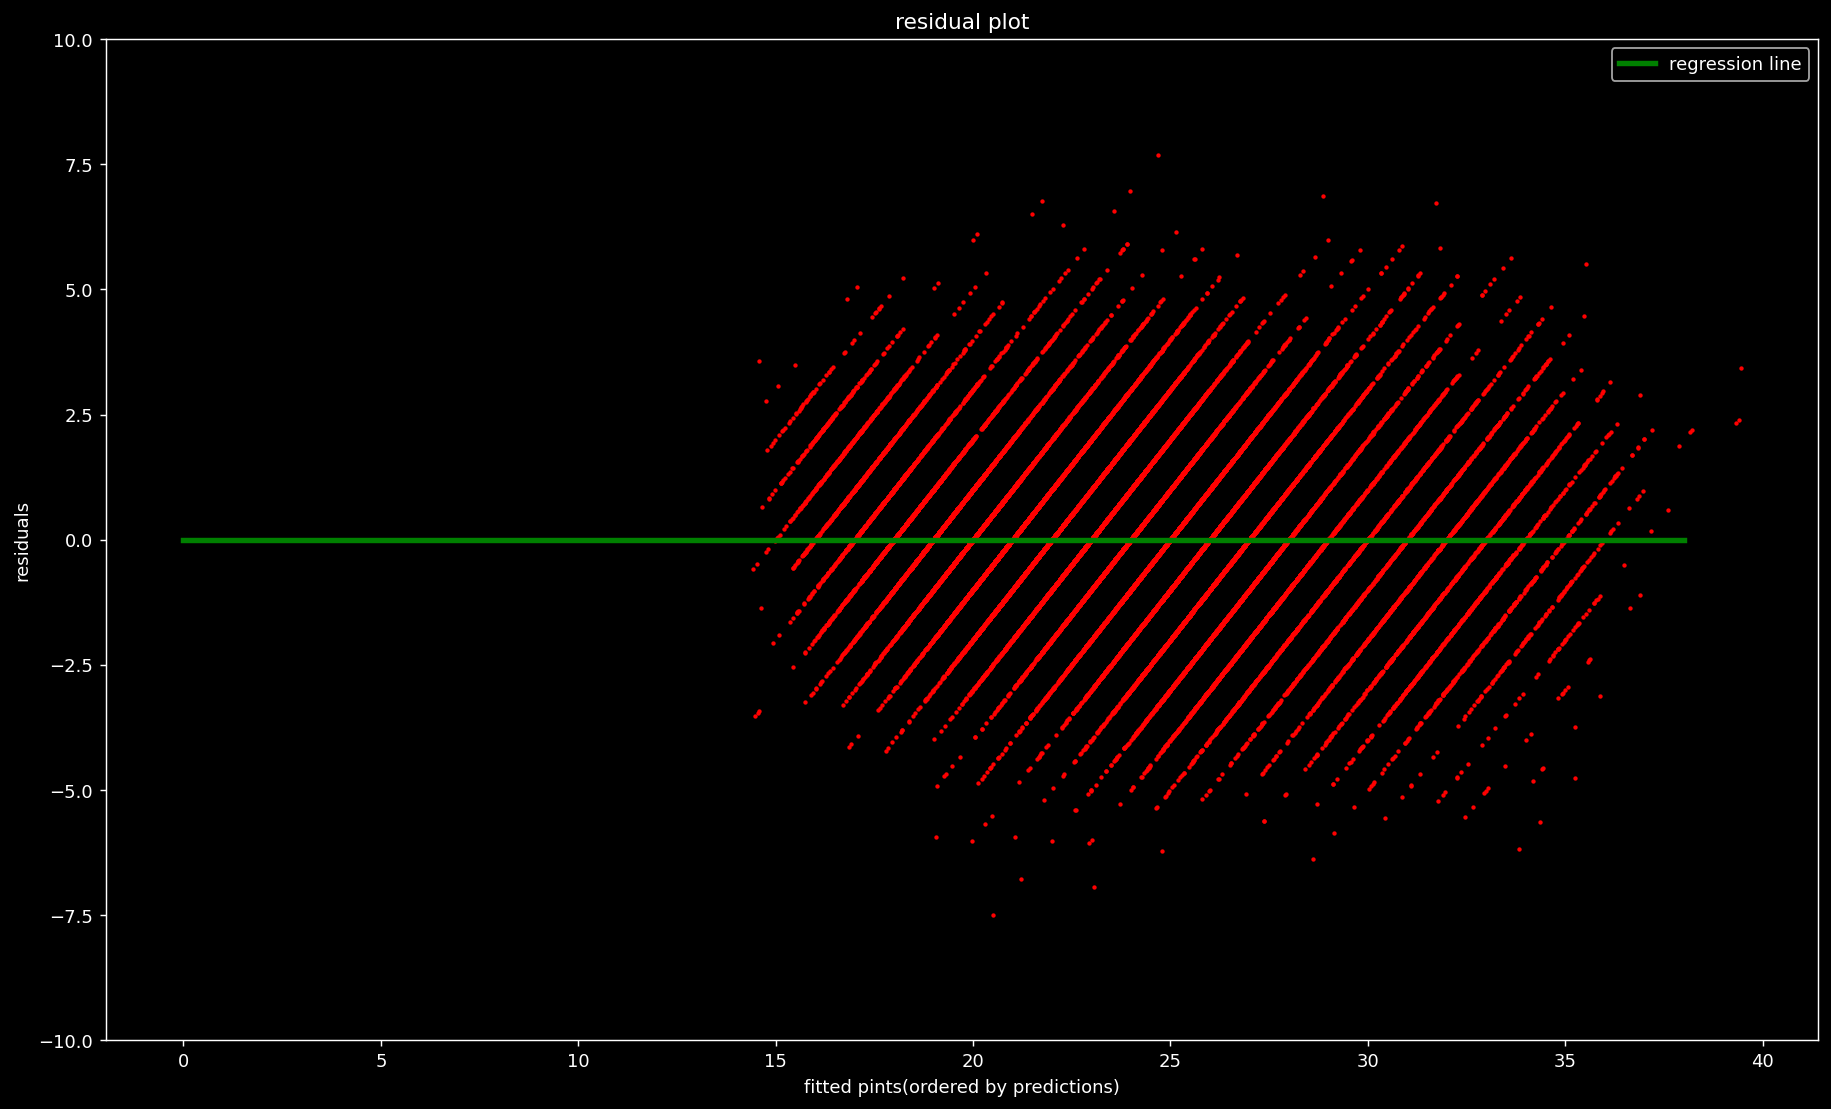

In [121]:
plt.style.use('dark_background')

plt.figure(dpi=130,figsize=(17,10))

plt.scatter(residual_table['predictions'],residual_table['residuals'],color='red',s=2)
plt.plot(z,k,color='green',linewidth=3,label='regression line')
plt.ylim(-10,10)
plt.xlabel('fitted pints(ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

# 2. Distribution of errors

Text(0.5, 1.0, 'distribution of residuals')

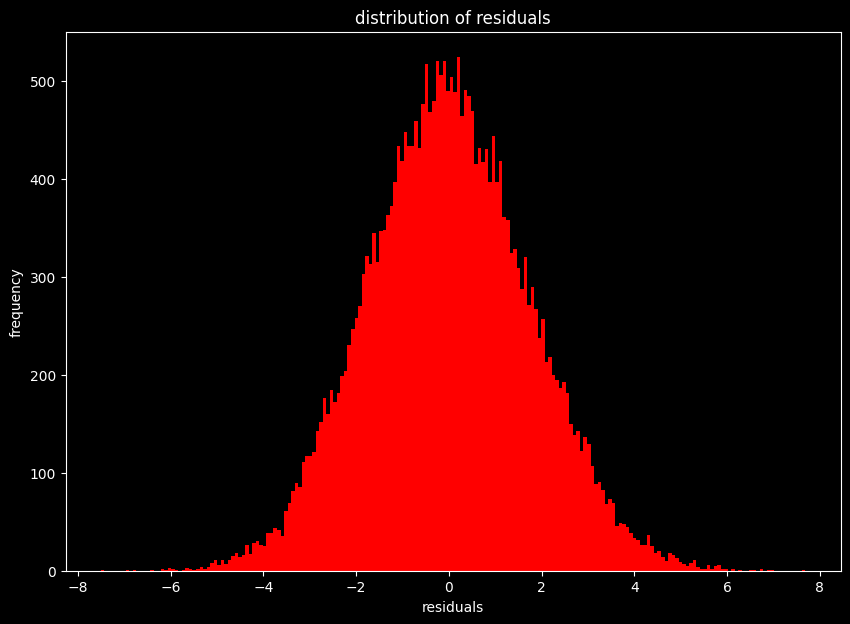

In [122]:
plt.figure(dpi=100,figsize=(10,7))
plt.hist(residual_table['residuals'],color='red',bins=200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')

# Model Coefficients

In [124]:
coefficients_table=pd.DataFrame({'column':x_train.columns,
                               'coefficients':lr.coef_})
coefficients_table=coefficients_table.sort_values(by="coefficients")
coefficients_table

,column,coefficients
7,DewPointC,-0.799755
10,pressure,-0.593341
13,windspeedKmph,-0.084892
12,winddirDegree,-0.079810
3,sunHour,-0.050567
9,precipMM,-0.032286
2,totalSnow_cm,0.000000
6,moon_illumination,0.000663
15,day,0.000703
16,month,0.029357


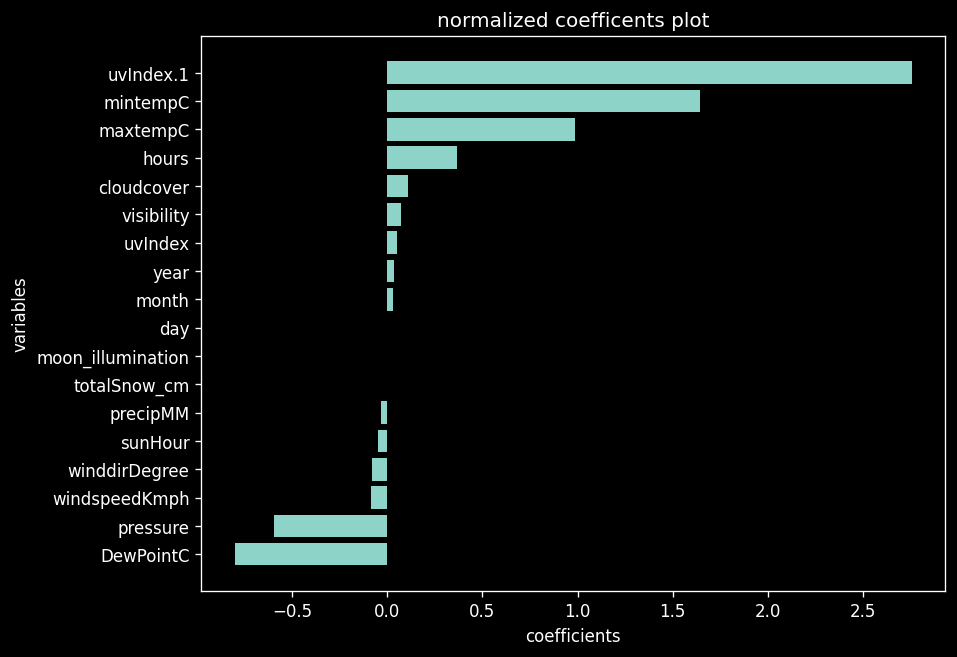

In [125]:
plt.figure(figsize=(8,6),dpi=120)
x=coefficients_table['column']
y=coefficients_table['coefficients']
plt.barh(x,y)
plt.xlabel('coefficients')
plt.ylabel('variables')
plt.title('normalized coefficents plot')
plt.show()

# conclusions 
# regression model efficiency : 0.8537225235812975